##### Curl script to read DWD data

curl "http://www.ogimet.com/cgi-bin/getsynop?block=10379&begin=202001010000&end=202008150000">DWD_code_data/data.txt 

((In the above command, block represents the DWD weather station index. begin & end is for the starting and ending time frame.))


##### Curl Script to read Ozone data

curl "https://www.esrl.noaa.gov/gmd/grad/neubrew/servlet/SatO3DataServlet?sat_id=OMI&lat=52.3906&lon=-13.0645&startdate=2020-01-01&enddate=2020-08-15&dateformat=yyyy%2F+MM%2Fdd%2CHH%3AMM&alldata=Y&meta=Y&view=text&width=800&height=600&bgcolor=gray&points=n">DWD_code_data/ozone.txt

just privide start date and end date inside the link 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#### data = np.loadtxt( 'pathak/Meteo/2011/201105.dat' )
# Jidata[1,:]


date = datetime.strptime(str(np.int64(data[10,3])) +','+str(np.int64(data[10,4]))+','+\
    str(np.int64(data[10,5]))+','+str(np.int64(data[10,6]))+\
    ','+str(np.int64(data[10,7])),'%Y,%m,%d,%H,%M')

datetime.strftime(date,'%Y-%m-%d %H:%M:%S')

NameError: name 'data' is not defined

In [195]:
np.int64(data[10,:])


array([1004,    7,   60, 2011,    5,    1,    1,   40])

In [82]:
os.getcwd()

'/Users/hrithikpandey/Documents/python/test_means'

In [124]:
# DateTime

In [112]:
myozone[1000][6:22]

'2020,02,11,16,00'

In [40]:
myozone[15:-1][0][8:22].replace(' ','')

'20,01,01,15,00'

In [178]:
import re
# re.findall('\d+\.\d+', myozone[15:-1][0][18:50])
# with open('DWD_code_data/ozone.txt') as f:
#     myozone = [line.rstrip('\n') for line in f]
# data = []
# for i in range(0,len(myozone[15:-1])):
#     a = re.findall('\d+\.\d+', myozone[15:-1][i][18:50])
#     data.append(a)
# import urllib

# link ="https://www.esrl.noaa.gov/gmd/grad/neubrew/servlet/SatO3DataServlet?sat_id=OMI&lat=52.3906&lon=13.0645&startdate=2018-08-15&enddate=2020-08-15&dateformat=yyyy%2F+MM%2Fdd%2CHH%3AMM&alldata=Y&meta=Y&view=text&width=800&height=600&bgcolor=gray&points=n"
# f = urllib.request.urlopen(link)           
# myfile = f.readline()  
# # print(myfile)


In [126]:
# data

In [3]:
def ozone_data(filename):
    with open(filename) as f:
        myozone = [line.rstrip('\n') for line in f]
    import re
    data = []
    for i in range(0,len(myozone[15:-1])):
        a = re.findall('\d+\.\d+', myozone[15:-1][i][18:50])
        data.append(a)
    
    k = np.array(data)
    p = k.astype(np.float)
    
    from datetime import datetime
    DateTime = []
    time = []
    for i in range(0,len(myozone[15:-1])):
        t = myozone[15:-1][i][0:12].replace(' ','')
        time.append(t)
#     print(time)
    for j in range(0,len(time)):
#         date_dt = datetime.strptime(time[j],'%Y/%m/%d,%H:%M')
#         DateTime.append(date_dt.strftime("%Y-%m-%d %H:%M:%S"))
        date_dt = datetime.strptime(time[j],'%Y,%m,%d')
        DateTime.append(date_dt.strftime("%Y-%m-%d %H:%M:%S"))
    df = pd.DataFrame({'O3_Nearest':p[:,0],'O3_Interpolated':p[:,1]})
    df_final = df.replace(0, value=np.nan)
    df_ = (df_final.fillna(method='ffill') + df_final.fillna(method='bfill'))/2
    df_d = pd.DataFrame({'DateTime':DateTime[:]})
    df_oz = pd.merge(df_d,df_,how='outer', on=None,\
                   left_index=True, right_index=True, sort=True) 
    return df_oz

In [4]:
ozone_data('DWD_code_data/ozone.txt')

DateTime  O3_Nearest  O3_Interpolated
0    2018-08-15 00:00:00       320.0          319.020
1    2018-08-16 00:00:00       310.0          309.952
2    2018-08-17 00:00:00       311.0          312.911
3    2018-08-18 00:00:00       311.0          311.269
4    2018-08-19 00:00:00       301.0          301.654
..                   ...         ...              ...
727  2020-08-11 00:00:00       300.0          298.739
728  2020-08-12 00:00:00       292.0          291.565
729  2020-08-13 00:00:00       291.0          288.649
730  2020-08-14 00:00:00       288.0          288.016
731  2020-08-15 00:00:00       302.0          300.520

[732 rows x 3 columns]

In [32]:
## Creating ozone database

df = ozone_data('DWD_code_data/ozone.txt')
# df.to_csv('DWD_code_data/ozone.csv',index = None, header = True)
# df
df.head()

DateTime  O3_Nearest  O3_Interpolated
0  2018-08-15 00:00:00       320.0          319.020
1  2018-08-16 00:00:00       310.0          309.952
2  2018-08-17 00:00:00       311.0          312.911
3  2018-08-18 00:00:00       311.0          311.269
4  2018-08-19 00:00:00       301.0          301.654

In [33]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

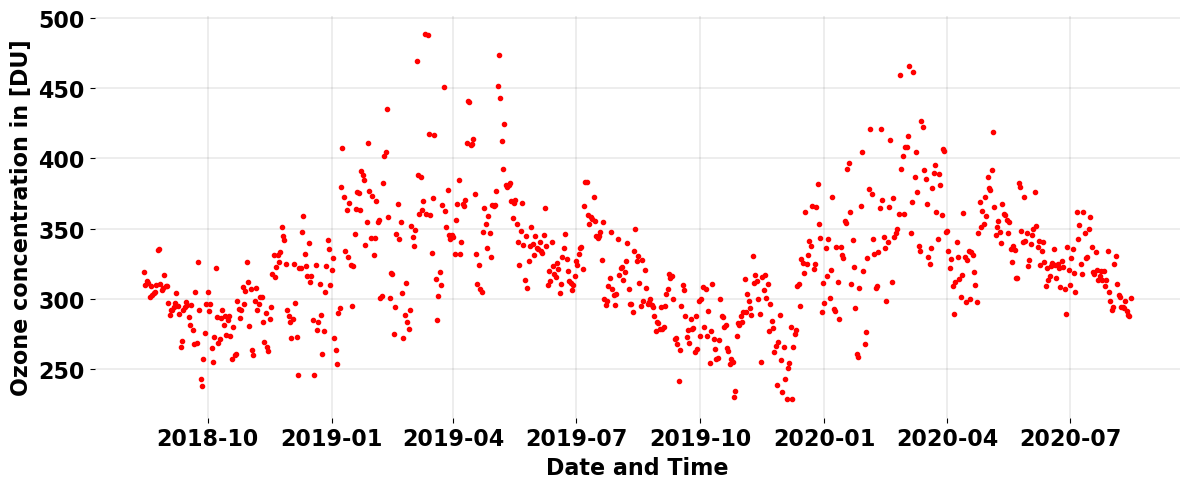

In [37]:
from jupyterthemes import jtplot
jtplot.reset()
plt.figure(figsize = (12,5))
plt.plot(df['DateTime'],df['O3_Interpolated'],'r.')

# plt.box()
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.xticks(fontsize = 16,fontweight = 'bold')

plt.yticks(fontsize = 16,fontweight = 'bold')
plt.xlabel('Date and Time',fontweight = 'bold',size = 16)
plt.ylabel('Ozone concentration in [DU]',fontweight = 'bold',size = 16)

plt.box()
plt.tight_layout()
plt.show()

In [56]:
# with open('DWD_code_data/data.txt') as f:
#         mylist = [line.rstrip('\n') for line in f]
# import re

# data = []
# for i in range(0,len(mylist)):
#     str1 = mylist[i][28:70].replace("/", "")
#     a = re.findall('\d+', str1 )
#     data.append(a)
    
# np.shape(data)
# len(data[3030])
# data[3030][8:22]
# a = np.nan
# a

nan

In [13]:
def DWD_data(filename):
    with open(filename) as f:
        mylist = [line.rstrip('\n') for line in f]
#     print(mylist)    
    import re
    data = []
    for i in range(0,len(mylist)):
        str1 = mylist[i][28:70].replace("/", "")
        a = re.findall('\d+', str1 )
        data.append(a)
#     print(np.shape(data))
    
    v_range = np.array([])
    cl_cover = np.array([])
    T_a = np.array([])
    T_d = np.array([])

    for i in range(0,len(data)):
#         print(i)
        if len(data[i]) == 7:
            a = int((data[i][2])[-2:]) 
#             v_range = np.append(v_range,a)

            if int((data[i][4])[1]) == 0:
                t = int((data[i][4])[-3:])/10
            else:
                t = -int((data[i][4])[-3:])/10
#             T_a = np.append(T_a,t)

            if int((data[i][5])[1]) == 0:
                t_d = int((data[i][5])[-3:])/10
            else:
                t_d = -int((data[i][5])[-3:])/10
#             T_d = np.append(T_d,t_d)   

            if len((data[i][3])) < 5:
                c = 0
            else: 
                c = int((data[i][3])[0])
#             cl_cover = np.append(cl_cover,c)
        else: 
            a = np.nan
            t = np.nan
            t_d = np.nan
            c = np.nan
        v_range = np.append(v_range,a)
        T_a = np.append(T_a,t)
        T_d = np.append(T_d,t_d) 
        cl_cover = np.append(cl_cover,c)
    
#     dataset = np.vstack((v_range,T_a,T_d,cl_cover)).T
    from datetime import datetime
    DateTime = []
    for i in range(0,len(mylist)):
        date_dt = datetime.strptime(mylist[i][8:22], '%y,%m,%d,%H,%M')
        DateTime.append(date_dt.strftime("%Y-%m-%d %H:%M:%S"))
    
    dataset = pd.DataFrame({'DateTime':DateTime[:],'Vis':v_range[:],'Amb_tem':T_a[:],\
                        'Dew_Tem':T_d[:],'Cloud':cl_cover})
    return dataset

# DWD_data('DwdStationData_20200101_20200720.txt')

In [15]:
# mylist[1][8:22]
df = DWD_data('DWD_code_data/data.txt')
df.head()

DateTime   Vis  Amb_tem  Dew_Tem  Cloud
0  2018-08-15 00:00:00  83.0     17.7     15.6    7.0
1  2018-08-15 01:00:00  83.0     17.2     15.1    5.0
2  2018-08-15 02:00:00  84.0     17.3     14.6    7.0
3  2018-08-15 03:00:00  84.0     16.6     14.4    7.0
4  2018-08-15 04:00:00  84.0     16.1     14.2    7.0

##### From here till the end, we are calculating the actual parameters based on the weather information obtained from DWD weather station. 


### AOD vs Visibility

\begin{align}
    AOD = \frac{\log (50)}{Vis} - 0.01159 ...[1]
\end{align}

### CWV for April 15-22

\begin{align}
    CWV = \exp(0.0341 T_d - 0.981) ...[2]
\end{align}

Where, $T_d$ is dew point temperature in $^{\circ}F$

Note: 

While reading the temperature from DWD weather station there are few things that we have to consider before we decode the metereological data. 

[1.] Consider the coded dew point temperature information is given like **:10185**, if the thousandth digit is 0, the temperature would be +18.5$^\circ$C. 

[2.] Consider the coded dew point temperature information is given like **:11185**, if the thousandth digit is 1, the temperature would be -18.5$^\circ$C.

Same thing is applicable for ambient temperature.
Ref:

[1] https://www.researchgate.net/publication/320683012_Propagation_of_uncertainty_in_atmospheric_parameters_to_hyperspectral_unmixing

[2]https://link.springer.com/content/pdf/10.1007/BF02247163.pdf

[3]https://earth.esa.int/landtraining09/D1Lb3_Su_SEBBasics.pdf [ESA radiation balance document]

In [19]:
##########################
### visibility Dataframe along with decrypted values
# km = np.array([0,1/8,1/4,3/8,1/2,5/8,3/4,1,\
#                1+1/4,1+ 1/2,1+3/4,2,2+1/4,2+1/2,\
#                3,4,5,6,7,8,9,10,11,12,13,14,15,19,\
#                 22,25,28,32,35,38,41,44,50])*1.60934

# code = np.array([0,2,4,6,8,10,12,16,20,24,28,\
#                  32,36,40,48,56,58,59,\
#                  61,62,64,66,67,69,70,72,74,\
#                 80,81,82,83,84,85,86,87,88,89])



## Since I have already created the csv look-up table, we don't need this anymore
#########################
# data_v = np.vstack((km,code)).T

# dwd_encode =  pd.DataFrame({'km':data_v[:,0],'Code':data_v[:,1]})
# dwd_encode.to_csv('DWD_code_data/vis_code.csv',index = False, header = True)
#########################
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

## function to decrypt the coded visibility
def visibility(x,y):
#     c = 0
    for i in range( 0, len(x)): 
        y = find_nearest(x[:,1],y)
#         print(y)
        if y == x[i,1]:
            c = x[i,0]
#         else
    return c

def CWV(x):
    y = np.exp(0.0341*(x*1.8 + 32) - 0.981)
    return y
##########################




In [21]:
# pd.read_csv('DWD_code_data/vis_code.csv')
# dwd_encode

In [22]:

### Calculating AOD and CWV based on the DWD dataset
def DWD_dataframe(dataset,filename_viscode):
    AOD = []
    Vis = []
    Cwv = np.array([])
    vis_data = pd.read_csv(filename_viscode).values

    dwd_vis = dataset[['Vis']].values
    dwd_dew = dataset[['Dew_Tem']].values

    for j in range(0,len(dwd_vis)):
    
    ## Aerosol optical depth
    
        vis = visibility(vis_data ,dwd_vis[j])
        dep = (np.log(50) / (vis)) - 0.01159
        Vis.append(vis)
    
        AOD.append(dep)
    
    ### Column water vapour
    
        cwv = np.exp(0.0341*(dwd_dew[j]*1.8 + 32) - 0.981)
        Cwv = np.append(Cwv,cwv)

    data_met = pd.DataFrame({'DateTime':dataset[['DateTime']].values[:,0],'CWV':Cwv[:],\
                         'dwd_vis':dwd_vis[:,0],'Vis':Vis[:],\
                         'AOD':AOD[:],'Amb_Tem':dataset[['Amb_tem']].values[:,0],\
                        'Dew_Tem':dataset[['Dew_Tem']].values[:,0],'cloud':dataset[['Cloud']].values[:,0]})
    
    return data_met

In [29]:
dataset = DWD_data('DWD_code_data/data.txt')
data_met = DWD_dataframe(dataset,'DWD_code_data/vis_code.csv')
# pd.read_csv('DWD_code_data/vis_code.csv')
# data_met.to_csv('DWD_code_data/DWD_final_data.csv',index = None , header = True)

In [27]:
# data_met.isna().sum()

DateTime    0
CWV         1
dwd_vis     1
Vis         0
AOD         0
Amb_Tem     1
Dew_Tem     1
cloud       1
dtype: int64

In [101]:
# data_met = data_met.dropna()

In [102]:
# data_met.loc[data_met.DateTime  == '2020-08-12 15:00:00' ]
data_met.head()

DateTime       CWV  dwd_vis       Vis       AOD  Amb_Tem  \
0  2018-08-15 00:00:00  2.908763     83.0  45.06152 -0.011503     17.7   
1  2018-08-15 01:00:00  2.820849     83.0  45.06152 -0.011503     17.2   
2  2018-08-15 02:00:00  2.735592     84.0  51.49888 -0.011514     17.3   
3  2018-08-15 03:00:00  2.702216     84.0  51.49888 -0.011514     16.6   
4  2018-08-15 04:00:00  2.669246     84.0  51.49888 -0.011514     16.1   

   Dew_Tem  cloud  
0     15.6    7.0  
1     15.1    5.0  
2     14.6    7.0  
3     14.4    7.0  
4     14.2    7.0

In [28]:
data_met['DateTime'] = pd.to_datetime(data_met['DateTime'])
data_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17525 entries, 0 to 17524
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  17525 non-null  datetime64[ns]
 1   CWV       17524 non-null  float64       
 2   dwd_vis   17524 non-null  float64       
 3   Vis       17525 non-null  float64       
 4   AOD       17525 non-null  float64       
 5   Amb_Tem   17524 non-null  float64       
 6   Dew_Tem   17524 non-null  float64       
 7   cloud     17524 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.1 MB


In [40]:
target = data_met[data_met['cloud'] <1]
target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1870 entries, 22 to 17478
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  1870 non-null   datetime64[ns]
 1   CWV       1870 non-null   float64       
 2   dwd_vis   1870 non-null   float64       
 3   Vis       1870 non-null   float64       
 4   AOD       1870 non-null   float64       
 5   Amb_Tem   1870 non-null   float64       
 6   Dew_Tem   1870 non-null   float64       
 7   cloud     1870 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 131.5 KB


In [41]:
target = target[target['AOD'] < 1.5]

In [42]:
from jupyterthemes import jtplot
jtplot.reset()
plt.figure(figsize = (12,5))
plt.plot(data_met['DateTime'],data_met['CWV'],'.')

# plt.box()
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.xticks(fontsize = 16,fontweight = 'bold')
plt.yticks(fontsize = 16,fontweight = 'bold')
plt.xlabel('Time',fontweight = 'bold',size = 16)
plt.ylabel('PWV in cm',fontweight = 'bold',size = 16)
plt.tight_layout()


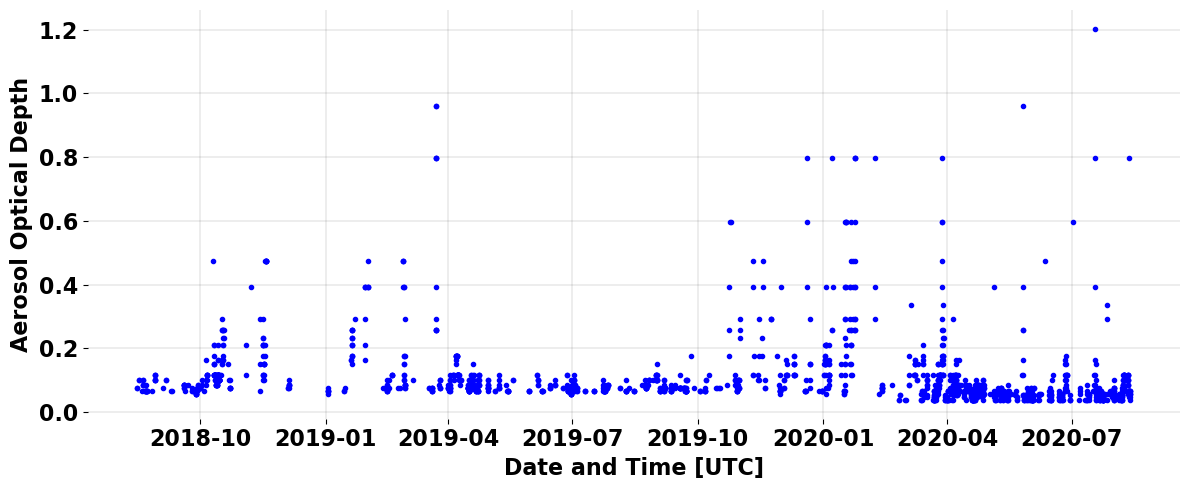

In [65]:
from jupyterthemes import jtplot
jtplot.reset()
plt.figure(figsize = (12,5))
# plt.plot(data_met['Vis'],data_met['AOD'],'.')
plt.plot(target['DateTime'],target['AOD'],'b.')

# plt.box()
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.xticks(fontsize = 16,fontweight = 'bold')
plt.yticks(fontsize = 16,fontweight = 'bold')
plt.xlabel('Date and Time [UTC]',fontweight = 'bold',size = 16)
plt.ylabel('Aerosol Optical Depth',fontweight = 'bold',size = 16)
plt.tight_layout()
plt.box()
plt.show()

In [25]:
# data_met.to_csv('DWD_code_data/DWD_final_data.csv',index = False, header = True)
os.getcwd()

'/Users/hrithikpandey/Documents/python/test_means'

In [48]:
df_1 = pd.read_csv('DWD_code_data/010120_290320.csv').values
df_2 = pd.read_csv('DWD_code_data/300320_251020.csv').values
df_3 = pd.read_csv('DWD_code_data/261020_311220.csv').values

df_ = np.vstack((df_1,df_2,df_3))

DateTime = []

for i in range(0,len(df_[:,0])):
    date_dt = datetime.strptime(df_[i,0][0:19], '%Y-%m-%d %H:%M:%S')
    DateTime.append(date_dt.strftime("%Y-%m-%d %H:%M:%S"))

sol_pos = pd.DataFrame({'DateTime':DateTime[:],'raa':df_[:,4],\
              'sza':df_[:,6],'elevation':df_[:,3]})

# pd.to_datetime(sol_pos['DateTime'])

In [49]:
sol_pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104547 entries, 0 to 104546
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   DateTime   104547 non-null  object
 1   raa        104547 non-null  object
 2   sza        104547 non-null  object
 3   elevation  104547 non-null  object
dtypes: object(4)
memory usage: 3.2+ MB


In [50]:
sol_pos['DateTime'] = pd.to_datetime(sol_pos['DateTime'])

In [51]:
# sol_pos.to_csv('DWD_code_data/sol_pos.csv',index = None,header = True)
# sol_pos[['DateTime']].values[0::1000].shape
# min(sol_pos['sza'])
# sol_pos.groupby(['sza']).agg(min)
sol_pos.min().DateTime

Timestamp('2020-01-01 00:00:00')

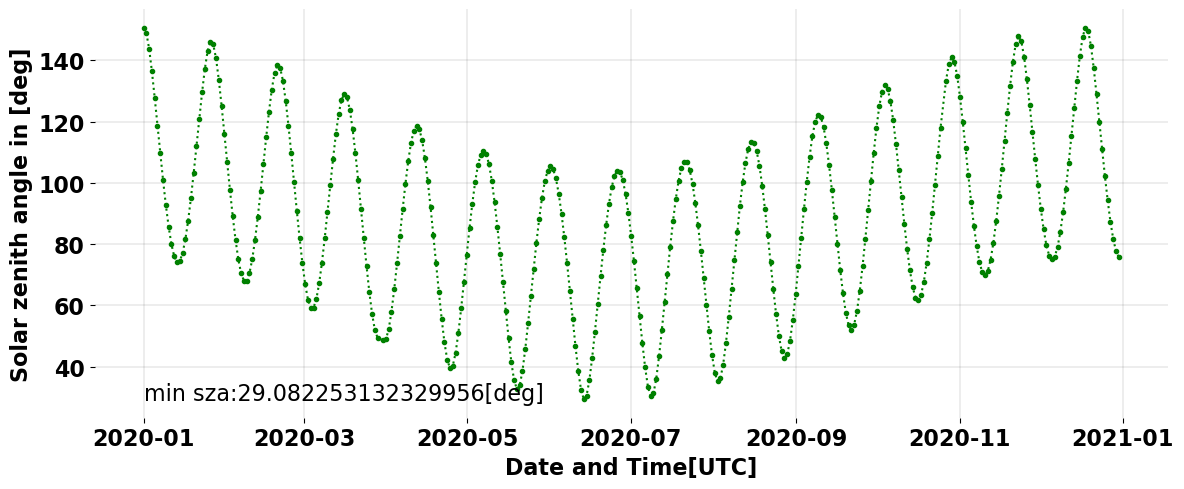

In [64]:
# fig, ax = plt.figure(figsize = (12,6))
plt.figure(figsize = (12,5))
style = dict(size=16, color='black')
plt.plot(sol_pos['DateTime'][0::300],sol_pos['sza'][0::300],'g.:')

plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.xticks(fontsize = 16,fontweight = 'bold')
plt.yticks(fontsize = 16,fontweight = 'bold')
plt.xlabel('Date and Time[UTC]',fontweight = 'bold',size = 16)
plt.ylabel('Solar zenith angle in [deg]',fontweight = 'bold',size = 16)
plt.text(sol_pos.min().DateTime,sol_pos.min().sza,f'min sza:{sol_pos.min().sza}[deg]',**style)
# plt.annotate('local maximum', xy=(sol_pos.min().DateTime, sol_pos.min().sza), xytext=(10, 4))
plt.tight_layout()
# plt.grid()
plt.box()
plt.show()

In [53]:
data_met.head(3)

DateTime       CWV  dwd_vis       Vis       AOD  Amb_Tem  \
0 2018-08-15 00:00:00  2.908763     83.0  45.06152  0.075225     17.7   
1 2018-08-15 01:00:00  2.820849     83.0  45.06152  0.075225     17.2   
2 2018-08-15 02:00:00  2.735592     84.0  51.49888  0.064373     17.3   

   Dew_Tem  cloud  
0     15.6    7.0  
1     15.1    5.0  
2     14.6    7.0

In [333]:
April = data_met.loc[(data_met.DateTime > '20/04/14,23:00') &\
            (data_met.DateTime < '20/04/23,00:00')]

Time = [] 
for i in range(0,len(April)):
#     for i in range(0,len(mylist)):
    date_dt = datetime.strptime(April[['DateTime']].values[i,0], '%y/%m/%d,%H:%M')
    Time.append(date_dt.strftime("%d,%H:%M"))

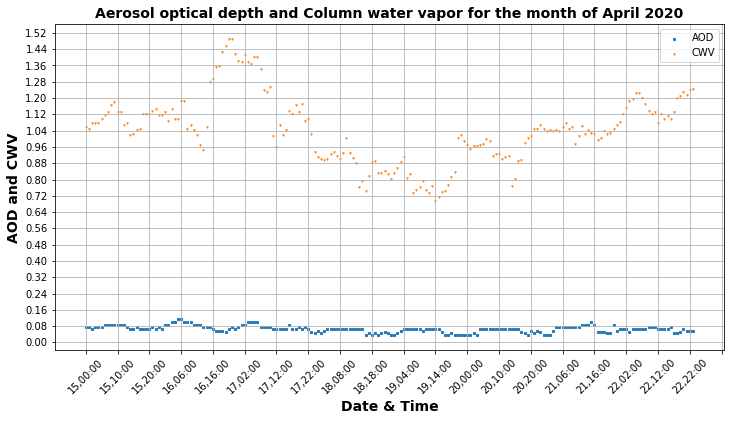

In [165]:
plt.figure(figsize = (12,6))
# ax1 = fig.add_subplot(111)

plt.scatter(Time,\
            April[['AOD']].values[:,0],marker = 'X',s = 5,label = 'AOD')

plt.scatter(Time,\
            April[['CWV']].values[:,0],marker = 'v',s = 2,label = 'CWV')
# ax1.set_xticks(ax1.get_xticks()[::5])
plt.xticks(np.arange(0,len(April[['DateTime']].values[:,0])+10,10),\
          rotation = 45)
# plt.xticks(Time)
# plt.xlim(np.min(April[['DateTime']].values),np.max(April[['DateTime']].values))

# for ticks in ax1.get_xticklabels():
#     ticks.set_rotation(45)
    
plt.yticks(np.arange(0,1.6,1.6/20))
plt.legend(loc = 'best')
plt.xlabel('Date & Time', fontweight='bold',size = 14)
plt.ylabel('AOD and CWV', fontweight='bold',size = 14)
plt.title('Aerosol optical depth and Column water vapor for the month of April 2020',\
          fontweight='bold',size = 14)
plt.grid()

In [ ]:
x = np.arange(2010,2020,1)

DateTime[DateTime[:,0] == f'']